In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

In [2]:
filename = "/Users/arnavprasad/Google Drive/Documents/Coding/Cricket/deliveries.csv"

cols = ["match_id", "batting_team", "bowling_team", "inning", "over", "ball", "total_runs"]

df = pd.read_csv(filename, usecols=cols)

df.rename(columns={"total_runs": "runs", "batting_team": "batting", "bowling_team": "bowling"}, inplace=True)

In [3]:
df.head()

,match_id,inning,batting,bowling,over,ball,runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,2


In [29]:
pd.set_option('mode.chained_assignment', None)

data = {}

#sort data by matches/innings in a dictionary
for i, row in df.iterrows():
    
    match_id = row["match_id"]
    inning = row["inning"]

    data[f"{match_id}, {inning}"] = {"scorecard": df[(df["match_id"] == match_id) & (df["inning"] == inning)],
    "batting": row["batting"], "bowling": row["bowling"]}


#get the total/halfway scores
for inning in data.copy().keys():
    sc = data[inning]["scorecard"]

    balls = len(sc)
    data[inning]["balls"] = balls


    sc["total_runs"] = sc["runs"].cumsum()


    final_score = sc["total_runs"].iloc[-1]
    data[inning]["final_score"] = final_score

    halfway = sc[sc["total_runs"] >= int(final_score/2)].iloc[0]


    #halfway point of the total score
    data[inning]["halfway point"] = halfway["over"] + halfway["ball"]/6

    del data[inning]["scorecard"]

    


In [65]:
summary = pd.DataFrame.from_dict(data, orient="index")

#Correct typos
summary["batting"] = summary["batting"].replace({"Rising Pune Supergiant": "Rising Pune Supergiants"})
summary["bowling"] = summary["bowling"].replace({"Rising Pune Supergiant": "Rising Pune Supergiants"})



In [66]:
#Look at lowest scores
summary[summary["final_score"] < 50]

,batting,bowling,balls,final_score,halfway point
"27, 2",Royal Challengers Bangalore,Kolkata Knight Riders,62,49,4.666667
"34, 3",Mumbai Indians,Gujarat Lions,5,11,1.333333
"34, 4",Gujarat Lions,Mumbai Indians,8,6,1.500000
"57, 2",Kolkata Knight Riders,Sunrisers Hyderabad,35,48,3.500000
"126, 3",Kolkata Knight Riders,Rajasthan Royals,7,15,1.666667
"126, 4",Rajasthan Royals,Kolkata Knight Riders,4,18,1.500000
"190, 3",Chennai Super Kings,Kings XI Punjab,5,9,1.666667
"190, 4",Kings XI Punjab,Chennai Super Kings,4,10,1.166667
"388, 3",Sunrisers Hyderabad,Royal Challengers Bangalore,7,20,1.666667
"388, 4",Royal Challengers Bangalore,Sunrisers Hyderabad,6,15,1.500000


In [67]:
#Need to separate out the low scores due to Duckworth/Lewis and Super overs
summary = summary[summary["final_score"] >= 49]

#Note: 49 is the lowest score in a full innings

In [68]:
#store data in a json file for quicker access
summary.to_json("/Users/arnavprasad/Google Drive/Documents/Coding/Cricket/results.json", orient="index")

summary.head()

,batting,bowling,balls,final_score,halfway point
"1, 1",Sunrisers Hyderabad,Royal Challengers Bangalore,125,207,12.833333
"1, 2",Royal Challengers Bangalore,Sunrisers Hyderabad,123,172,10.166667
"2, 1",Mumbai Indians,Rising Pune Supergiants,125,184,12.000000
"2, 2",Rising Pune Supergiants,Mumbai Indians,122,187,11.000000
"3, 1",Gujarat Lions,Kolkata Knight Riders,122,183,10.833333


In [4]:
#Can start here if simply using the json file

summary = pd.read_json("/Users/arnavprasad/Google Drive/Documents/Coding/Cricket/results.json", orient="index")

summary.head()

,batting,bowling,balls,final_score,halfway point
"1, 1",Sunrisers Hyderabad,Royal Challengers Bangalore,125,207,12.833333
"1, 2",Royal Challengers Bangalore,Sunrisers Hyderabad,123,172,10.166667
"2, 1",Mumbai Indians,Rising Pune Supergiants,125,184,12.000000
"2, 2",Rising Pune Supergiants,Mumbai Indians,122,187,11.000000
"3, 1",Gujarat Lions,Kolkata Knight Riders,122,183,10.833333


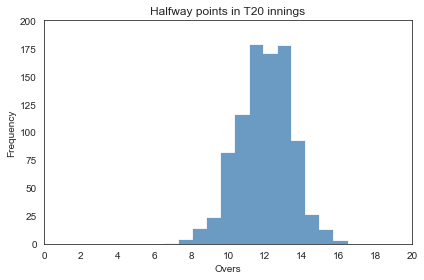

In [5]:
#Verifying halfway points of innings

plt.figure()
plt.xlim(0, 20)
plt.ylim(0, 200)
plt.xticks(range(0, 21, 2))

#only look at innings that lasted all 20 overs
plt.hist(summary[summary["balls"] > 120]["halfway point"], histtype="stepfilled", color="steelblue", bins=13, alpha=0.8)

plt.xlabel("Overs")
plt.ylabel("Frequency")
plt.title("Halfway points in T20 innings")

plt.tight_layout()

plt.savefig("/Users/arnavprasad/Documents/GitHub/cricket-analysis/halfway_pts.jpg", dpi=600)

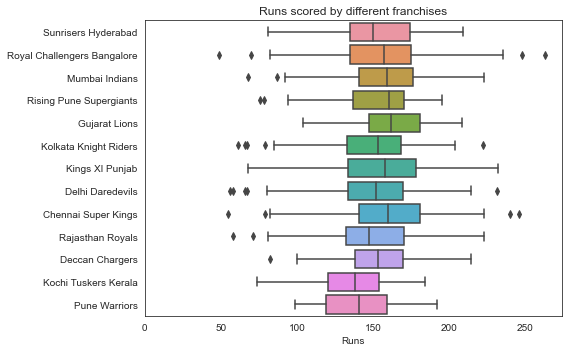

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=summary, y="batting", x="final_score", orient="h")
plt.xlim(left=0)
plt.xlabel("Runs")
plt.ylabel(None)
plt.title("Runs scored by different franchises")

plt.tight_layout()

plt.savefig("/Users/arnavprasad/Documents/GitHub/cricket-analysis/final_scores.jpg", dpi=600)
